Now we will do the EDA of the given dataset 

In [1]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt    

#model libraries 
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dividing the dependent and independent features


In [4]:
X=df.drop(columns=['math_score'],axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())      

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [7]:
Y=df['math_score']

In [8]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

Creation of Column Transformer

In [10]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer= OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [12]:
X=preprocessor.fit_transform(X)        

In [13]:
X.shape

(1000, 19)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=29)
X_train.shape,X_test.shape

((800, 19), (200, 19))

Creation an Evaluation Function to give all metrics after model training

In [16]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training set')
    print("-Root Mean Squarred Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model Performance for Training set
-Root Mean Squarred Error: 5.3144
- Mean Absolute Error: 4.1959
- R2 Score: 0.8761
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4045
- Mean Absolute Error: 4.4494
- R2 Score: 0.8762


Lasso
Model Performance for Training set
-Root Mean Squarred Error: 6.5677
- Mean Absolute Error: 5.2030
- R2 Score: 0.8108
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5925
- Mean Absolute Error: 5.1441
- R2 Score: 0.8158


Ridge
Model Performance for Training set
-Root Mean Squarred Error: 5.3083
- Mean Absolute Error: 4.1955
- R2 Score: 0.8764
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4173
- Mean Absolute Error: 4.4757
- R2 Score: 0.8756


K-Neighbors Regressor
Model Performance for Training set
-Root Mean Squarred Error: 5.8986
- Mean Absolute Error: 4.6593
- R2 Score: 0.8474
-----------------------

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.876214
2,Ridge,0.875625
7,CatBoosting Regressor,0.851080
5,Random Forest Regressor,0.829754
1,Lasso,0.815811
6,XGBRegressor,0.814830
8,AdaBoost Regressor,0.814486
3,K-Neighbors Regressor,0.793398
4,Decision Tree,0.694001


In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.62


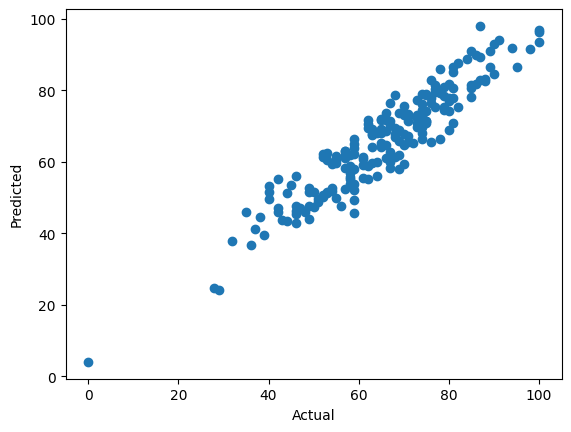

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

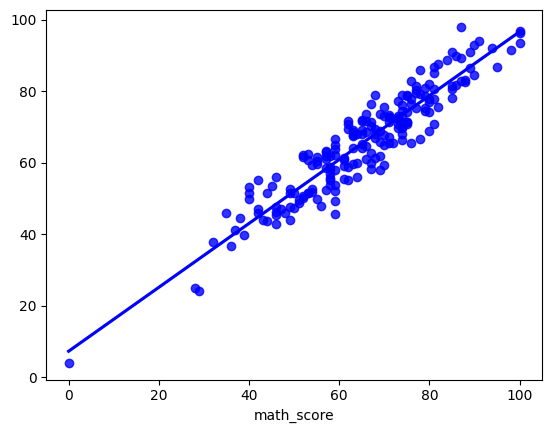

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='b');

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
795,57,63.1250,-6.1250
973,49,52.5625,-3.5625
794,42,46.0000,-4.0000
694,49,51.5625,-2.5625
587,44,51.3750,-7.3750
...,...,...,...
374,59,63.9375,-4.9375
137,70,67.8125,2.1875
970,89,90.8750,-1.8750
989,67,70.3125,-3.3125
